In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Construction_Data_PM_Forms_All_Projects.csv'
data = pd.read_csv(file_path)
print(data.head())

         Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name     Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary  15/09/2020            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
4  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcont

This loads your CSV file into a Pandas DataFrame and displays the first few rows to give you an overview of the data.

In [ ]:

print("Dataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10254 entries, 0 to 10253
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ref                  10254 non-null  object
 1   Status               10254 non-null  object
 2   Location             10254 non-null  object
 3   Name                 10254 non-null  object
 4   Created              10254 non-null  object
 5   Type                 10254 non-null  object
 6   Status Changed       10254 non-null  object
 7   Open Actions         10254 non-null  int64 
 8   Total Actions        10254 non-null  int64 
 9   Association          2098 non-null   object
 10  OverDue              10254 non-null  bool  
 11  Images               10254 non-null  bool  
 12  Comments             10254 non-null  bool  
 13  Documents            9450 non-null   object
 14  Project              10254 non-null  int64 
 15  Report Forms Status  10252 non-null  ob

data.info(): Shows the number of rows, columns, and data types.
data.isnull().sum(): Identifies missing values in each column.
data.describe(): Provides summary statistics (mean, min, max, etc.) for numerical columns.


In [ ]:

numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# to reduce error by the missing values
for column in data.select_dtypes(include='object').columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
print(data.isnull().sum())

NameError: name 'data' is not defined

Numerical columns are filled with their mean.
Categorical columns are filled with their mode.
Missing values are checked again to ensure they’re handled.


In [ ]:
if 'Planned_Start_Date' in data.columns and 'Actual_Start_Date' in data.columns:
    data['Planned_Start_Date'] = pd.to_datetime(data['Planned_Start_Date'])
    data['Actual_Start_Date'] = pd.to_datetime(data['Actual_Start_Date'])

    data['Delay_Days'] = (data['Actual_Start_Date'] - data['Planned_Start_Date']).dt.days

    #it helps to make the analysis more relavent to the problem ( eg: tracking delays or resources effieciency)

if 'Resources_Allocated' in data.columns and 'Budget' in data.columns:
    data['Resource_Utilization'] = (data['Resources_Allocated'] / data['Budget']) * 100

print(data.head())

         Ref                Status  \
0  F145185.4                Opened   
1  F1.495500  Open / Ongoing Works   
2  F1.495499  Open / Ongoing Works   
3  F1.495498  Open / Ongoing Works   
4  F1.495496  Open / Ongoing Works   

                                            Location  \
0  01 Daily Site Diary>Site Management>JPC Projec...   
1  02 Daily Work Plan>Site Management>JPC Project...   
2  02 Daily Work Plan>Site Management>JPC Project...   
3  02 Daily Work Plan>Site Management>JPC Project...   
4  02 Daily Work Plan>Site Management>JPC Project...   

                             Name     Created                       Type  \
0   1328 CM-SM-FRM-001 Site Diary  15/09/2020            Site Management   
1  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
2  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
3  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcontractor Inspections   
4  SM-FRM-SUB-101 Daily Work Plan  15/09/2020  Subcont

Converts date columns to datetime format for easier manipulation.
Creates a new column Delay_Days to measure delays.
Creates a new column Resource_Utilization to measure resource efficiency (if applicable).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Progress Percentage (if applicable)
if 'Progress_Percentage' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['Progress_Percentage'], kde=True)
    plt.title('Progress Percentage Distribution')
    plt.xlabel('Progress Percentage')
    plt.ylabel('Frequency')
    plt.show()

# Plot Delay Days (if applicable)
if 'Delay_Days' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Delay_Days'])
    plt.title('Delay Days Distribution')
    plt.xlabel('Delay Days')
    plt.show()

A histogram shows the distribution of progress percentages (if applicable).
A boxplot highlights the range and outliers in delay days (if applicable).

In [ ]:
if 'Planned_Start_Date' in data.columns and 'Delay_Days' in data.columns:
    data.dropna(subset=['Planned_Start_Date', 'Delay_Days'], inplace=True)

    data['Planned_Start_Date'] = pd.to_datetime(data['Planned_Start_Date'])
    data['Delay_Days'] = pd.to_numeric(data['Delay_Days'], errors='coerce')

    data_sorted = data.sort_values(by='Planned_Start_Date')

    plt.figure(figsize=(12, 6))
    plt.plot(data_sorted['Planned_Start_Date'], data_sorted['Delay_Days'], marker='o', linestyle='-', color='orange')
    plt.title('Delay Days Over Time')
    plt.xlabel('Planned Start Date')
    plt.ylabel('Delay Days')
    plt.grid(True)
    plt.show()

else:
    print("One or both columns ('Planned_Start_Date', 'Delay_Days') are missing in the dataset.")

One or both columns ('Planned_Start_Date', 'Delay_Days') are missing in the dataset.


In [ ]:
# Check if 'Budget' and 'Progress_Percentage' columns exist
if 'Budget' in data.columns and 'Progress_Percentage' in data.columns:
    # Plot a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Budget', y='Progress_Percentage', data=data, hue='Project_ID', palette='Set2')
    plt.title('Budget vs. Progress Percentage')
    plt.xlabel('Budget')
    plt.ylabel('Progress Percentage (%)')
    plt.legend(title='Project ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
    plt.show()

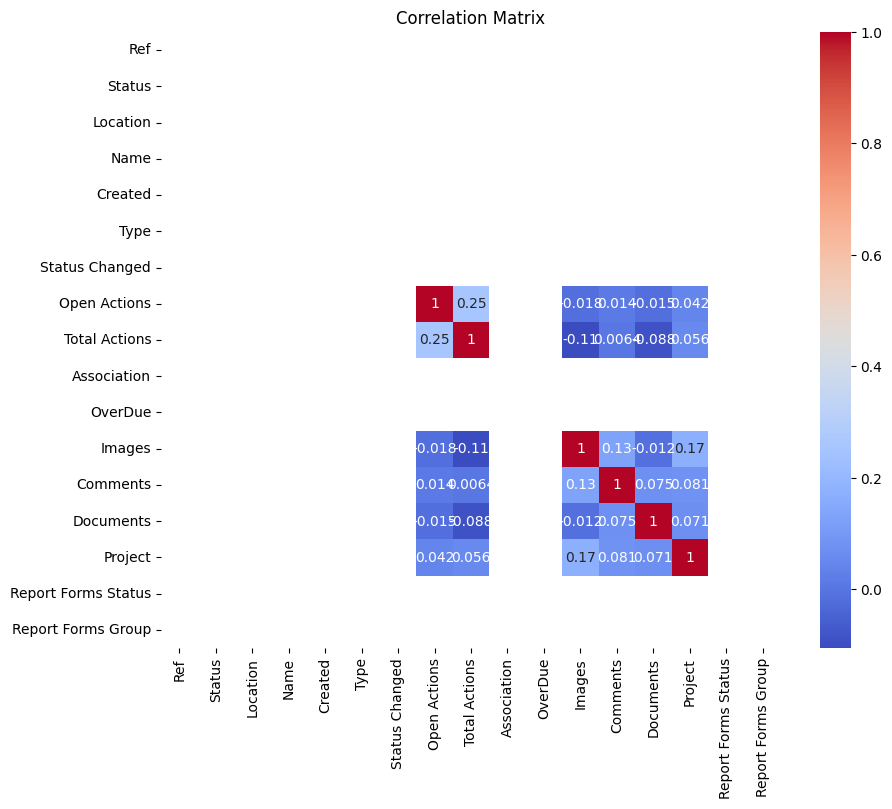

In [ ]:
# Correlation matrix to identify relationships between numerical columns
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Please check its contents.")

      #it helps to visulize like relationship between the budget and the pregress, this guides feature selection foe ml models

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

if 'Project_ID' in data.columns and 'Progress_Percentage' in data.columns:
    average_progress = data.groupby('Project_ID')['Progress_Percentage'].mean()
    print("\nAverage Progress Percentage by Project:")
    print(average_progress)

A correlation matrix identifies relationships between numerical features.
Groupby calculates the average progress percentage for each project (if applicable).


Available categorical columns: ['project_type', 'milestone_name', 'status']

Column: project_type
Unique Values: ['Type A' 'Type B' None 'Type C']
Number of NaN values: 1

Column: milestone_name
Unique Values: ['M1' 'M2' 'M3']
Number of NaN values: 0

Column: status
Unique Values: ['Completed' 'In Progress' None]
Number of NaN values: 1


<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-33-0b8da9154c29>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')


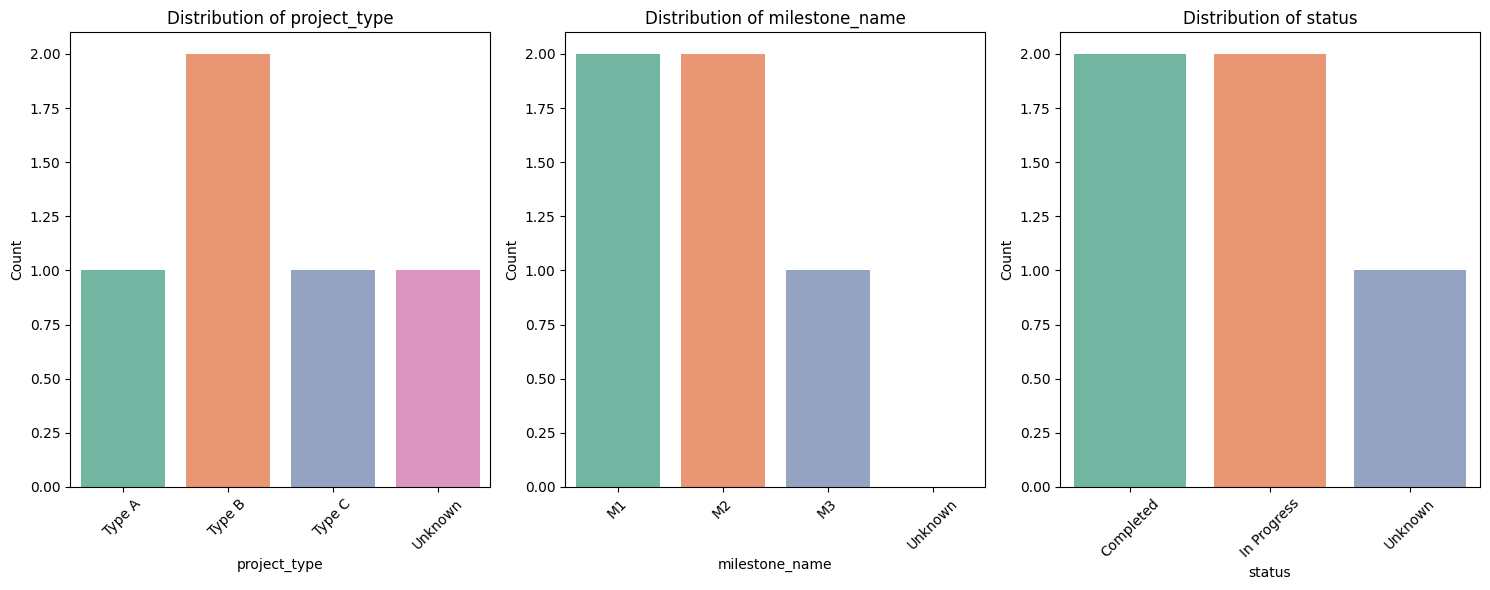

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace this with your actual data loading logic)
# Uncomment the line below if you're reading from a CSV file
# data = pd.read_csv('your_file.csv')

# Example: Replace this with your actual DataFrame
data = pd.DataFrame({
    'Project_Type': ['Type A', 'Type B', None, 'Type C', 'Type B'],
    'Milestone_Name': ['M1', 'M2', 'M1', 'M3', 'M2'],
    'Status': ['Completed', 'In Progress', 'Completed', None, 'In Progress']
})

# Step 1: Normalize column names (strip spaces and convert to lowercase)
data.columns = data.columns.str.strip().str.lower()

# Define categorical columns (ensure these match the normalized column names)
categorical_columns = ['project_type', 'milestone_name', 'status']

# Step 2: Filter available categorical columns
available_categorical_columns = [col for col in categorical_columns if col in data.columns]

if available_categorical_columns:
    print(f"Available categorical columns: {available_categorical_columns}")

    # Step 3: Check unique values and handle missing data
    for col in available_categorical_columns:
        print(f"\nColumn: {col}")
        print(f"Unique Values: {data[col].unique()}")
        print(f"Number of NaN values: {data[col].isnull().sum()}")

        # Convert column to categorical type
        data[col] = data[col].astype('category')

        # Fill missing values with "Unknown" (optional, you can drop them instead)
        data[col] = data[col].cat.add_categories("Unknown").fillna("Unknown")

    # Step 4: Plotting
    plt.figure(figsize=(15, 6))

    for i, col in enumerate(available_categorical_columns, 1):
        plt.subplot(1, len(available_categorical_columns), i)

        # Check if the column has any non-null values
        if data[col].notnull().any():
            sns.countplot(data=data, x=col, palette='Set2')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
        else:
            print(f"No non-null values found in column: {col}")

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns available for distribution analysis.")

Shows the frequency of each category in categorical columns like Project_Type, Milestone_Name, or Status.
Helps you identify dominant categories or imbalances in the data.

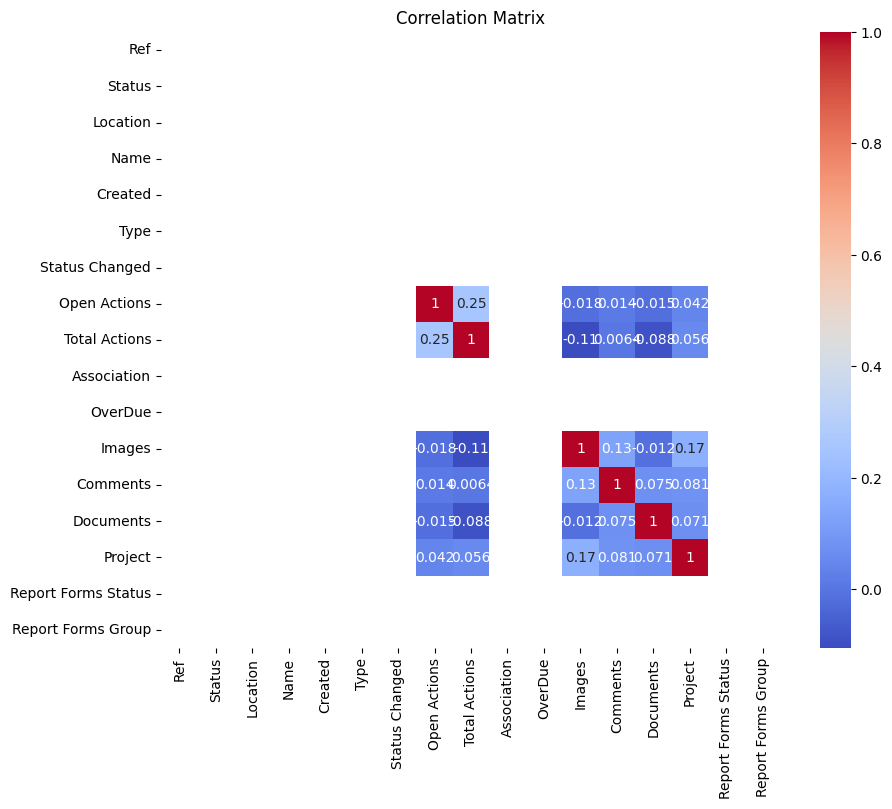

No numerical columns available for outlier detection.


<ipython-input-29-8d0cc8c7584d>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-29-8d0cc8c7584d>:50: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=data, x=col, palette='Set2')


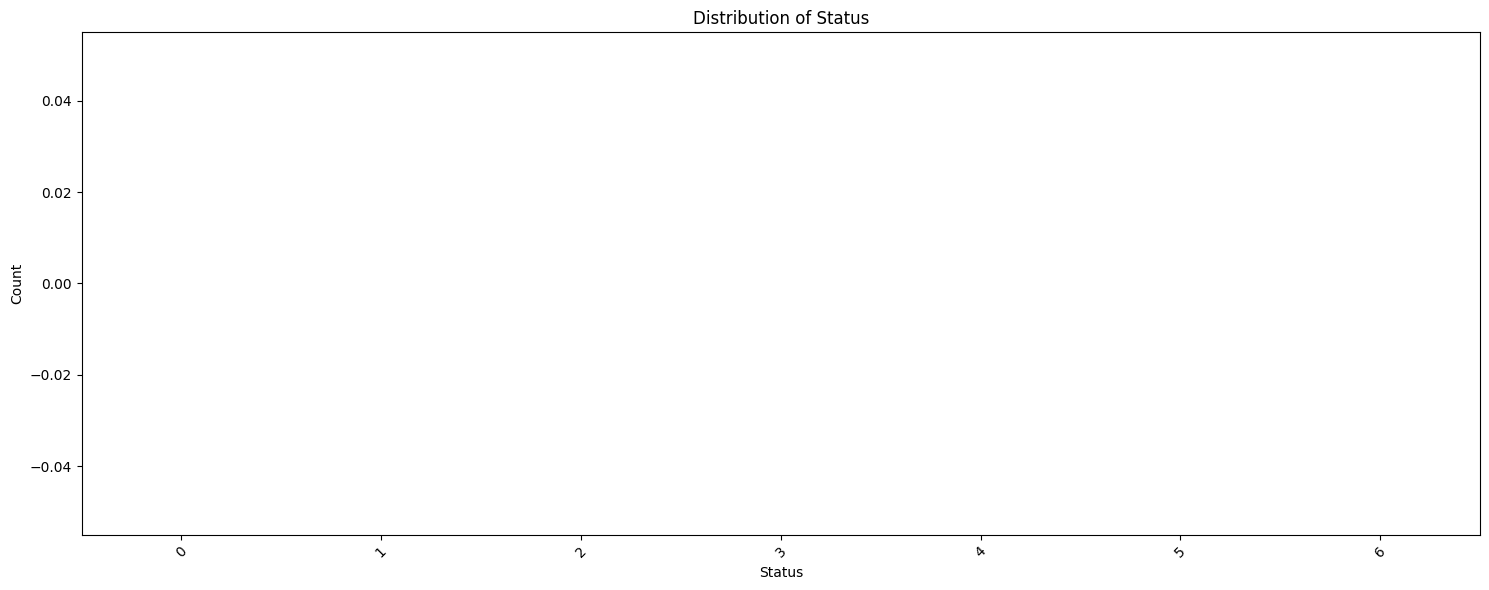

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Analysis
# Convert relevant columns to numeric if they contain non-numeric values
for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Please check its contents.")

# Calculate the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Group by Project_ID and calculate average progress percentage (if applicable)
if 'Project_ID' in data.columns and 'Progress_Percentage' in data.columns:
    average_progress = data.groupby('Project_ID')['Progress_Percentage'].mean()
    print("\nAverage Progress Percentage by Project:")
    print(average_progress)

# Boxplot for Outlier Detection
numerical_columns = ['Delay_Days', 'Budget', 'Progress_Percentage']
available_columns = [col for col in numerical_columns if col in data.columns]

if available_columns:
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(available_columns, 1):
        plt.subplot(1, len(available_columns), i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns available for outlier detection.")

# Count Plot for Categorical Data Distribution
categorical_columns = ['Project_Type', 'Milestone_Name', 'Status']  # Replace with actual column names
available_categorical_columns = [col for col in categorical_columns if col in data.columns]

if available_categorical_columns:
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(available_categorical_columns, 1):
        plt.subplot(1, len(available_categorical_columns), i)
        sns.countplot(data=data, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns available for distribution analysis.")

Correlation Matrix :
Identifies relationships between numerical features.
Helps you understand which variables are strongly correlated.
Boxplot for Outlier Detection :
Highlights extreme values in numerical columns like Delay_Days, Budget, or Progress_Percentage.
Useful for identifying potential anomalies.
Count Plot for Categorical Data :
Shows the frequency of categories in columns like Project_Type, Milestone_Name, or Status.
Helps you understand the distribution of categorical data.

In [ ]:
pip install pandas lxml


In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET



In [ ]:

def xml_to_csv(xml_folder):
    data_list = []

    for xml_file in glob.glob(xml_folder + "/*.xml"):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        filename = root.find("filename").text
        width = int(root.find("size/width").text)
        height = int(root.find("size/height").text)

        for obj in root.findall("object"):
            class_name = obj.find("name").text
            xmin = int(obj.find("bndbox/xmin").text)
            ymin = int(obj.find("bndbox/ymin").text)
            xmax = int(obj.find("bndbox/xmax").text)
            ymax = int(obj.find("bndbox/ymax").text)

            data_list.append([filename, width, height, class_name, xmin, ymin, xmax, ymax])

    # Convert to DataFrame
    df = pd.DataFrame(data_list, columns=["filename", "width", "height", "class", "xmin", "ymin", "xmax", "ymax"])
    return df

# Convert annotations to CSV
xml_folder = "annotations"  # Replace with your XML folder path
df = xml_to_csv(xml_folder)

# Save to CSV
df.to_csv("helmet_annotations.csv", index=False)
print("XML annotations converted to CSV successfully!")

XML annotations converted to CSV successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install ultralytics opencv-python matplotlib


In [ ]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [ ]:

# Define transformation for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

class HelmetDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        with open(labels_file, 'r') as f:
            self.labels = [line.strip().split(',') for line in f]
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path, label = self.labels[idx]
        image = cv2.imread(os.path.join(self.img_dir, img_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(int(label))



In [ ]:
train_dataset = HelmetDataset(img_dir="dataset/train", labels_file=".csv", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/train_labels.csv'